In [4]:
import pandas as pd
results = []
fewshots = [0, 3, 5, 10]
for _id in fewshots:
    record_path = f'eval_results/eval_results_gpt_3_5/ajgt_few_shot/ajgt-fewshot-{_id}-temp-1.0.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['gpt-3.5', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [5]:
!ls eval_results/eval_results_gpt_3_5/ajgt_few_shot/

ajgt-fewshot-0-temp-1.0.jsonl	ajgt-fewshot-3-temp-1.0.jsonl
ajgt-fewshot-10-temp-1.0.jsonl	ajgt-fewshot-5-temp-1.0.jsonl


In [6]:
import pandas as pd
for _id in fewshots:
    record_path = f'eval_results/eval_results_gpt_4_0/ajgt_few_shot/ajgt-fewshot-{_id}-temp-1.0{"" if _id !=0 else "_updated_prompt"}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['gpt-4.0', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [7]:
results

[['gpt-3.5', 0, 0.8694],
 ['gpt-3.5', 3, 0.8083],
 ['gpt-3.5', 5, 0.85],
 ['gpt-3.5', 10, 0.842],
 ['gpt-4.0', 0, 0.9114],
 ['gpt-4.0', 3, 0.9284],
 ['gpt-4.0', 5, 0.9537],
 ['gpt-4.0', 10, 0.9231]]

In [8]:
df = pd.DataFrame(results)
df.columns = ['Model', 'Temperature', 'Accuracy']

In [9]:
df

,Model,Temperature,Accuracy
0,gpt-3.5,0,0.8694
1,gpt-3.5,3,0.8083
2,gpt-3.5,5,0.8500
3,gpt-3.5,10,0.8420
4,gpt-4.0,0,0.9114
5,gpt-4.0,3,0.9284
6,gpt-4.0,5,0.9537
7,gpt-4.0,10,0.9231


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns    

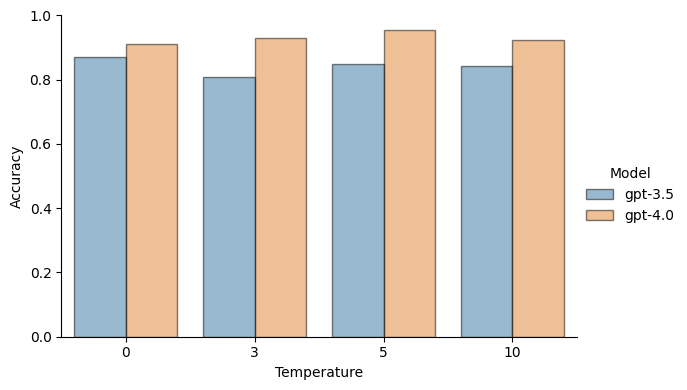

In [11]:
sns.catplot(
    x="Temperature", 
    y="Accuracy", 
    data=df, 
    kind="bar",
    hue = "Model",
    errorbar = "sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    height=4, 
    aspect=1.5,
    alpha=0.5,)